In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [11]:
data = pd.read_csv("result.csv", names=["T", "mu"])

In [30]:
sigma_mu = 0.01
sigma_T = 0.00001
data["1T"] = 1/data["T"]
sigma_1T = 0.00001#1 / sigma_T
X = data["1T"].values
sigma_X = sigma_1T
Y = data["mu"].values
sigma_Y = sigma_mu

In [31]:
A = np.vstack([X, np.ones(len(X))]).T
k, b = np.linalg.lstsq(A, Y, rcond=None)[0]
#sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
#eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

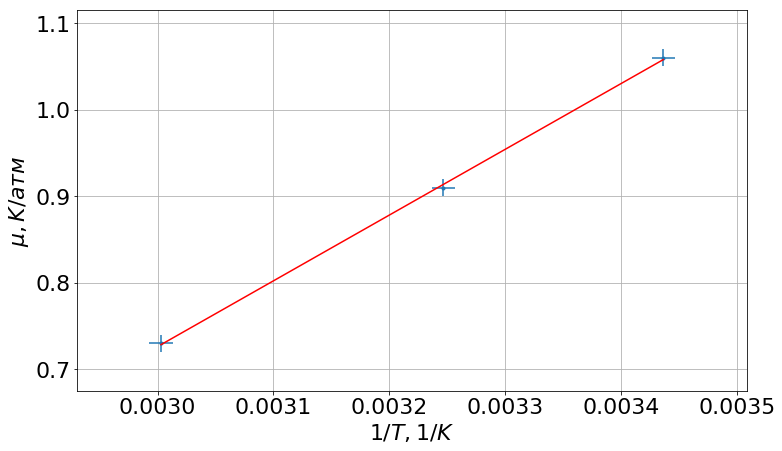

In [32]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.xlabel("$1 / T, 1 / K$")
plt.ylabel("$\mu, K / атм$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("../result.png")

In [7]:
k

760.314092362127

In [8]:
b

-1.5548469848371718

In [6]:
data

,T,mu
0,291,1.06
1,308,0.91
2,333,0.73


In [9]:
data.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &    P &    U &     T \\\\\n\\midrule\n0 &  4.0 &  138 &  3.47 \\\\\n1 &  3.6 &  120 &  3.02 \\\\\n2 &  3.2 &  102 &  2.56 \\\\\n3 &  2.8 &   85 &  2.14 \\\\\n4 &  2.4 &   68 &  1.71 \\\\\n5 &  2.0 &   55 &  1.38 \\\\\n\\bottomrule\n\\end{tabular}\n'